In [1]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_train=working_directory+'/train_finance.csv'
path_test=working_directory+'/test_finance.csv'
# path_test=working_directory+'/test_finance_last10elminate.csv'
path_latest=working_directory+'/test_latest.csv'
path_submit=working_directory+'/submit_finance.csv'

#データフレームの生成
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)
df_latest=pd.read_csv(path_latest)
df_submit=pd.read_csv(path_submit)

In [2]:
# Dateがobject型になっているので日付型に変換
df_train['Date']=pd.to_datetime(df_train['Date'],format='%Y/%m/%d')
df_test['Date']=pd.to_datetime(df_test['Date'],format='%Y/%m/%d')
df_latest['Date']=pd.to_datetime(df_latest['Date'],format='%Y/%m/%d')

In [3]:
#データの確認
df_train.describe()

,High,Low,Open,Close
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.910559,123.526205,123.529490
std,9.210193,9.493319,9.188003,9.184970
min,108.520946,6.743457,107.993884,107.998923
25%,117.002707,115.863246,116.408944,116.427990
50%,123.242134,121.951219,122.590435,122.573382
75%,130.814157,129.393252,130.201913,130.179930
max,148.260942,146.834717,147.832063,147.888796


### Train異常値処理

In [4]:
# Trainデータ異常値
df_train[(df_train['Low']<10)]
no=df_train[(df_train['Low']<10)].index
# print(f'欠損データ確認(df_train)\n{typeInfo(no)}\n')

In [5]:
# df_train.iloc[no:no+1] #インデックス指定されてるものでないとilocの範囲指定に使えない
print(f'異常値▲1日\n{df_train.iloc[no-1]}\n')
print(f'異常値当日\n{df_train.iloc[no]}\n')
print(f'異常値+1日\n{df_train.iloc[no+1]}\n')

異常値▲1日
           Date        High         Low        Open       Close
1114 2008-03-14  145.059359  143.736202  144.513188  144.465784

異常値当日
           Date        High       Low        Open       Close
1115 2008-03-17  147.103265  6.743457  145.669288  145.669288

異常値+1日
           Date        High         Low        Open      Close
1116 2008-03-18  146.409411  144.456764  145.660125  144.83676



In [6]:
ave =(df_train['Low'][1114]+df_train['Low'][1116]) /2
ave

144.09648299217224

In [7]:
df_train['Low'][1115]=ave
df_train['Low'][1115]

144.09648299217224

In [8]:
df_train.describe()

,High,Low,Open,Close
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.976785,123.526205,123.529490
std,9.210193,9.155624,9.188003,9.184970
min,108.520946,107.748581,107.993884,107.998923
25%,117.002707,115.876669,116.408944,116.427990
50%,123.242134,121.954434,122.590435,122.573382
75%,130.814157,129.426294,130.201913,130.179930
max,148.260942,146.834717,147.832063,147.888796


In [9]:
#データの確認
df_test.describe()

,High,Low,Open,Close
count,1246.000000,1246.000000,1246.000000,1246.000000
mean,111.424603,110.675657,111.069958,111.070373
std,9.206534,9.270658,9.215541,9.214999
min,96.767439,70.352906,96.364197,96.357173
25%,103.722807,103.064503,103.422443,103.422154
50%,108.456692,107.796669,108.091687,108.082215
75%,120.690221,119.751722,120.218867,120.219641
max,129.417693,128.691531,128.851618,128.858797


## 目的変数の追加

In [10]:
#翌日始値と当日終値の差のカラム（shift）を作成
df_train["Shift"]=df_train["Open"].shift(-1)

#目的変数の作成
df_train["Diff"]=df_train["Shift"]-df_train["Close"]
df_train["Up"]=df_train["Diff"].apply(lambda x:1 if x>=0 else 0)
df_train=df_train.dropna()
df_train=df_train[["Date","High","Low","Open","Close","Up"]]
df_train.head(10)

,Date,High,Low,Open,Close,Up
0,2003-12-01,111.370639,110.482062,111.314347,110.676377,0
1,2003-12-02,112.008532,110.500532,110.639316,111.823016,1
2,2003-12-03,112.202814,111.712284,111.832477,112.137524,0
3,2003-12-04,112.332259,111.406851,112.110343,111.748717,0
4,2003-12-05,112.766375,111.609834,111.721723,112.729259,0
5,2003-12-08,113.220483,112.425105,112.553700,113.035088,1
6,2003-12-09,113.562415,112.831025,113.044748,113.312017,0
7,2003-12-10,113.460736,112.498941,113.303692,112.766375,1
8,2003-12-11,113.173376,112.137524,112.766375,113.072392,1
9,2003-12-12,113.830743,112.970206,113.100037,113.580543,0


##　差分の追加

In [11]:
# df_train['Body'] = df_train['Open'] - df_train['Close']
# df_test['Body'] = df_test['Open'] - df_test['Close']

In [12]:
df_train.head()

,Date,High,Low,Open,Close,Up
0,2003-12-01,111.370639,110.482062,111.314347,110.676377,0
1,2003-12-02,112.008532,110.500532,110.639316,111.823016,1
2,2003-12-03,112.202814,111.712284,111.832477,112.137524,0
3,2003-12-04,112.332259,111.406851,112.110343,111.748717,0
4,2003-12-05,112.766375,111.609834,111.721723,112.729259,0


In [13]:
df_test.head()

,Date,High,Low,Open,Close
0,2011-12-15,120.703596,119.907182,120.132990,120.139231
1,2011-12-16,121.027367,120.314249,120.527453,120.524311
2,2011-12-19,120.629617,120.111145,120.582444,120.591872
3,2011-12-20,121.470779,120.221987,120.323633,120.322078
4,2011-12-21,122.046150,120.513328,121.063789,121.063789


## 単純移動平均の追加

In [14]:
#　移動平均の期間
span01=6
# span02=6
# span03=12

In [15]:
df_train['SMA01']=df_train['Close'].rolling(window=span01).mean()
df_test['SMA01']=df_test['Close'].rolling(window=span01).mean()

# df_train['SMA02']=df_train['Close'].rolling(window=span01).mean()
# df_test['SMA02']=df_test['Close'].rolling(window=span01).mean()

# df_train['SMA03']=df_train['Close'].rolling(window=span01).mean()
# df_test['SMA03']=df_test['Close'].rolling(window=span01).mean()

In [16]:
# 
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close  Up  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377   0   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016   1   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524   0   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717   0   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259   0   
...         ...         ...         ...         ...         ...  ..   
2068 2011-12-07  124.436662  123.521080  124.061165  124.061165   0   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661   0   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260   1   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906   0   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361   0   

           SMA01  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
2068  12

In [17]:
# 移動平均1日目を取り合えす終値で埋める
df_train['SMA01'][0]=df_train['Close'][0]
df_test['SMA01'][0]=df_test['Close'][0]

# df_train['SMA02'][0]=df_train['Close'][0]
# df_test['SMA02'][0]=df_test['Close'][0]

# df_train['SMA03'][0]=df_train['Close'][0]
# df_test['SMA03'][0]=df_test['Close'][0]

In [18]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close  Up  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377   0   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016   1   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524   0   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717   0   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259   0   
...         ...         ...         ...         ...         ...  ..   
2068 2011-12-07  124.436662  123.521080  124.061165  124.061165   0   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661   0   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260   1   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906   0   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361   0   

           SMA01  
0     110.676377  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
2068  12

In [19]:
#線形補間
df_train=df_train.interpolate()
df_test=df_test.interpolate()

In [20]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close  Up  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377   0   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016   1   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524   0   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717   0   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259   0   
...         ...         ...         ...         ...         ...  ..   
2068 2011-12-07  124.436662  123.521080  124.061165  124.061165   0   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661   0   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260   1   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906   0   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361   0   

           SMA01  
0     110.676377  
1     110.946101  
2     111.215825  
3     111.485549  
4     111.755273  
...          ...  
2068  12

## ボリンジャーバンド

In [21]:
df_train['mean'] = df_train['Close'].rolling(window=span01).mean()
df_train['std'] = df_train['Close'].rolling(window=span01).std()
df_train['upper'] = df_train['mean'] + (df_train['std'] * 2)
df_train['lower'] = df_train['mean'] - (df_train['std'] * 2)

df_test['mean'] = df_test['Close'].rolling(window=span01).mean()
df_test['std'] = df_test['Close'].rolling(window=span01).std()
df_test['upper'] = df_test['mean'] + (df_test['std'] * 2)
df_test['lower'] = df_test['mean'] - (df_test['std'] * 2)

In [22]:
# bband = pd.DataFrame()
# bband['Close'] = df_train['Close']
# bband['mean'] = df_train['Close'].rolling(window=span01).mean()
# bband['std'] = df_train['Close'].rolling(window=span01).std()
# bband['upper'] = bband['mean'] + (bband['std'] * 2)
# bband['lower'] = bband['mean'] - (bband['std'] * 2)

In [23]:
df_train[18:25]

,Date,High,Low,Open,Close,Up,SMA01,mean,std,upper,lower
18,2003-12-25,115.348160,115.098423,115.227460,115.144273,1,114.866415,114.866415,0.259252,115.384918,114.347912
19,2003-12-26,115.356794,114.949671,115.162908,114.995399,1,114.880224,114.880224,0.264356,115.408937,114.351511
20,2003-12-29,115.698759,114.976819,115.013991,115.476325,1,115.032777,115.032777,0.304376,115.641529,114.424024
21,2003-12-30,116.207494,115.467680,115.495071,116.077697,1,115.264014,115.264014,0.472642,116.209297,114.318730
22,2003-12-31,117.002707,115.903164,116.087908,116.457671,1,115.556920,115.556920,0.584663,116.726247,114.387594
23,2004-01-01,116.623592,115.384129,116.457671,116.382942,1,115.755718,115.755718,0.635583,117.026884,114.484552
24,2004-01-02,116.809152,115.874130,116.382942,116.382942,1,115.962163,115.962163,0.597270,117.156703,114.767623


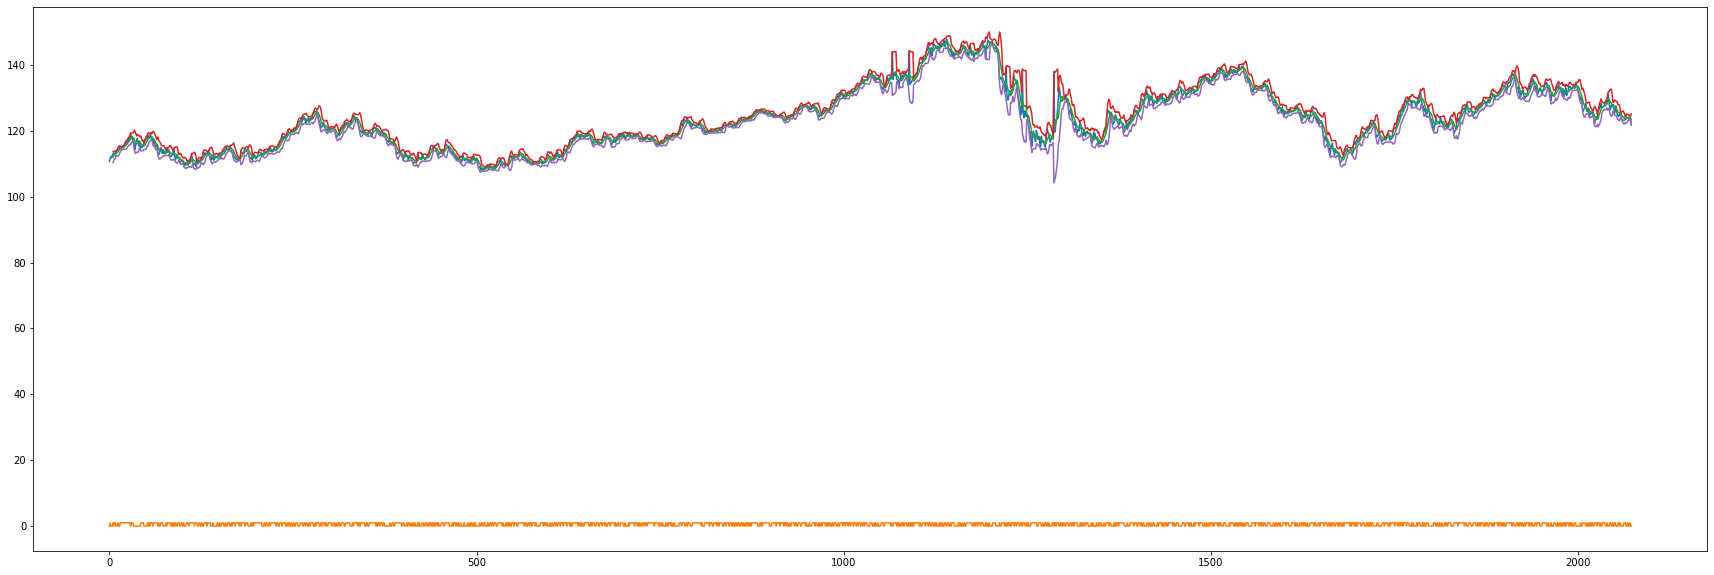

In [24]:
bband=df_train
drop = ['Date', 'High','Low', 'Open', 'SMA01', 'std',]
bband = df_train.drop(columns=drop,axis=1) 

fig = plt.subplots(figsize=(30,10))
# plt.title('Bollinger Band')
# plt.ylabel('USD/JPY')
plt.plot(bband)
# plt.legend()

In [25]:
df_train

,Date,High,Low,Open,Close,Up,SMA01,mean,std,upper,lower
0,2003-12-01,111.370639,110.482062,111.314347,110.676377,0,110.676377,NaN,NaN,NaN,NaN
1,2003-12-02,112.008532,110.500532,110.639316,111.823016,1,110.946101,NaN,NaN,NaN,NaN
2,2003-12-03,112.202814,111.712284,111.832477,112.137524,0,111.215825,NaN,NaN,NaN,NaN
3,2003-12-04,112.332259,111.406851,112.110343,111.748717,0,111.485549,NaN,NaN,NaN,NaN
4,2003-12-05,112.766375,111.609834,111.721723,112.729259,0,111.755273,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2068,2011-12-07,124.436662,123.521080,124.061165,124.061165,0,124.031256,124.031256,0.460481,124.952218,123.110295
2069,2011-12-08,124.476855,123.126484,123.959751,123.984661,0,124.154053,124.154053,0.267667,124.689388,123.618718
2070,2011-12-09,124.227770,122.895824,123.445260,123.445260,1,124.002202,124.002202,0.369144,124.740490,123.263915
2071,2011-12-12,123.745819,122.202555,123.681290,123.687906,0,123.855345,123.855345,0.256670,124.368685,123.342005


In [26]:
# mean/std削除＋1日目を取り合えす終値で埋める
drop = ['mean', 'std',]
df_train = df_train.drop(columns=drop,axis=1) 
df_train['lower'][0]=df_train['Close'][0]
df_train['upper'][0]=df_train['Close'][0]

df_test = df_test.drop(columns=drop,axis=1) 
df_test['lower'][0]=df_test['Close'][0]
df_test['upper'][0]=df_test['Close'][0]

In [27]:
#線形補間
df_train=df_train.interpolate()
df_test=df_test.interpolate()

In [28]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close  Up  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377   0   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016   1   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524   0   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717   0   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259   0   
...         ...         ...         ...         ...         ...  ..   
2068 2011-12-07  124.436662  123.521080  124.061165  124.061165   0   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661   0   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260   1   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906   0   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361   0   

           SMA01       upper       lower  
0     110.676377  110.676377  110.676377  
1     110.946101  111.279080  110.613123  
2     111.21

## 指数移動平滑平均(EMA)の追加

In [29]:
# # EMA関数
# def EMA(df,span):
#     df["EMA"] = df["Close"].ewm(span=span).mean()
#     return df

In [30]:
# EMAを計算する
# df_train = EMA(df_train,span01)
# df_test = EMA(df_test,span01)

In [31]:
df_train['EMA01']=df_train['Close'].ewm(span=span01, adjust=False).mean()
df_test['EMA01']=df_test['Close'].ewm(span=span01, adjust=False).mean()

# df_train['EMA02']=df_train['Close'].ewm(span=span02, adjust=False).mean()
# df_test['EMA02']=df_test['Close'].ewm(span=span02, adjust=False).mean()

# df_train['EMA03']=df_train['Close'].ewm(span=span03, adjust=False).mean()
# df_test['EMA03']=df_test['Close'].ewm(span=span03, adjust=False).mean()

In [32]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close  Up  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377   0   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016   1   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524   0   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717   0   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259   0   
...         ...         ...         ...         ...         ...  ..   
2068 2011-12-07  124.436662  123.521080  124.061165  124.061165   0   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661   0   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260   1   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906   0   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361   0   

           SMA01       upper       lower       EMA01  
0     110.676377  110.676377  110.676377  110.676377  
1     110.946101  111.279080  1

##　ピボットポイント

In [33]:
## PPをShiftしてるが使い方合ってるか不明
df_train['PP'] = ((df_train['High'].shift(1) + df_train['Low'].shift(1) + df_train['Close'].shift(1)) / 3)
df_train['R1'] = (2 * df_train['PP'] - df_train['Low'])
df_train['S1'] = (2 * df_train['PP'] - df_train['High'])
df_train['R2'] = (df_train['PP'] + df_train['High'] - df_train['Low'])
df_train['S2'] = (df_train['PP'] - df_train['High'] + df_train['Low'])
df_train['R3'] = (df_train['High'] + 2 * (df_train['PP'] -df_train['Low']))
df_train['S3'] = (df_train['Low'] - 2 * (df_train['High'] - df_train['PP']))

## PPをShiftしてるが使い方合ってるか不明
df_test['PP'] = ((df_test['High'].shift(1) + df_test['Low'].shift(1) + df_test['Close'].shift(1)) / 3)
df_test['R1'] = (2 * df_test['PP'] - df_test['Low'])
df_test['S1'] = (2 * df_test['PP'] - df_test['High'])
df_test['R2'] = (df_test['PP'] + df_test['High'] - df_test['Low'])
df_test['S2'] = (df_test['PP'] - df_train['High'] + df_test['Low'])
df_test['R3'] = (df_test['High'] + 2 * (df_test['PP'] -df_test['Low']))
df_test['S3'] = (df_test['Low'] - 2 * (df_test['High'] - df_test['PP']))

In [34]:
# df_train['Close'].shift(1)

In [35]:
# 1日目を取り合えす終値で埋める
df_train['PP'][0]=df_train['Close'][0]
df_train['R1'][0]=df_train['Close'][0]
df_train['S1'][0]=df_train['Close'][0]
df_train['R2'][0]=df_train['Close'][0]
df_train['S2'][0]=df_train['Close'][0]
df_train['R3'][0]=df_train['Close'][0]
df_train['S3'][0]=df_train['Close'][0]


df_test['PP'][0]=df_test['Close'][0]
df_test['R1'][0]=df_test['Close'][0]
df_test['S1'][0]=df_test['Close'][0]
df_test['R2'][0]=df_test['Close'][0]
df_test['S2'][0]=df_test['Close'][0]
df_test['R3'][0]=df_test['Close'][0]
df_test['S3'][0]=df_test['Close'][0]

In [36]:
#線形補間
df_train=df_train.interpolate()
df_test=df_test.interpolate()

In [37]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close  Up  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377   0   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016   1   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524   0   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717   0   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259   0   
...         ...         ...         ...         ...         ...  ..   
2068 2011-12-07  124.436662  123.521080  124.061165  124.061165   0   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661   0   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260   1   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906   0   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361   0   

           SMA01       upper       lower       EMA01          PP          R1  \
0     110.676377  110.676377  110.676377  110.676377  110.676

## RSIの追加

In [38]:
# # RSI関数
# def RSI(df,span):
#     #　終値の差分
#     df_diff=df.diff()
    
#     # 値上幅と値下幅
#     df_up, df_down = df_diff.copy(), df_diff.copy()
#     df_up[df_up < 0] = 0
#     df_down[df_down > 0] = 0
#     df_down = df_down * -1
    
#     # 移動平均
#     up_sma_01 = df_up.rolling(window=span01, center=False).mean()
#     down_sma_01 = df_down.abs().rolling(window=span01, center=False).mean()

#     # RSI
#     df = up_sma_01 / (up_sma_01 + down_sma_01) * 100

#     return df

In [39]:
# df_train['RSI01']=RSI(df_train['Close'],span01)
# df_test['RSI01']=RSI(df_test['Close'],span01)

In [40]:
# df_train.to_csv('IdoHeikin.csv')

In [41]:
# # 結果
# print(f'train\n{df_train}\n')
# print(f'test\n{df_test}\n')

In [42]:
# #ブランクは取り敢えず50で埋める
# df_train['RSI01']=df_train['RSI01'].fillna(50)
# df_test['RSI01']=df_test['RSI01'].fillna(50)

In [43]:
# # 最初の行除外
# df_train=df_train[span01:]

In [44]:
# # 結果
# print(f'train\n{df_train}\n')
# print(f'test\n{df_test}\n')

In [45]:
#  df_train.to_csv('IdoHeikin.csv')

In [46]:
# del df_train['RSI01']
# del df_test['RSI01']

## MACEの追加

In [47]:
# # MACE関数
# def macd(df):
#     FastEMA_period = 12  # 短期EMAの期間
#     SlowEMA_period = 26  # 長期EMAの期間
# #     SignalSMA_period = 9  # SMAを取る期間
#     SignalSMA_period = span01  # SMAを取る期間
    
#     df["MACD"] = df["Close"].ewm(span=FastEMA_period).mean() - df["Close"].ewm(span=SlowEMA_period).mean()
#     df["Signal"] = df["MACD"].rolling(SignalSMA_period).mean()
#     return df

In [48]:
# # MACDを計算する
# df_train = macd(df_train)
# df_test = macd(df_test)

In [49]:
# df_train.head(20)

In [50]:
# df_test

In [51]:
# import mpl_finance as mpf
# # import mplfinance as mpf
# # import matplotlib.finance
# # from matplotlib.finance import candlestick_ohlc
 
# # チャート定義
# fig, ax = plt.subplots(2, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
 
# # ローソク足チャートをプロット
# mpl_finance.candlestick_ohlc(ax[0], df.values, width=0.5, colorup='r', colordown='b')
 
# # MACDをプロット
# ax[1].plot(df_train["index"], df_train["MACD"], label="MACD")
# ax[1].plot(df_train["index"], df_train["Signal"], label="Signal")
 
# # X軸を調整
# plt.xticks([x for x in range(len(df))], [x.strftime('%Y-%m-%d') for x in df.index])
# fig.autofmt_xdate()
 
# # 凡例表示, グリッド表示
# for a in ax:
#     a.legend()
#     a.grid()
 
# # グラフを表示
# plt.show()

In [52]:
# df_train=df_train[span01-1:]
# df_train

## 多項式特徴量/多項式回帰/交互作用特徴量

In [53]:
# EMAに多項式特徴量を適用してみる
# df_train["EMA"] = df_train["EMA"] **2
# df_test["EMA"] = df_test["EMA"] **2

## フィールド削除

In [54]:
# mean/std削除＋1日目を取り合えす終値で埋める
drop = ['upper', 'lower', 'PP','R1','S1','R2','S2','R3','S3','SMA01']
df_train = df_train.drop(columns=drop,axis=1) 

df_test = df_test.drop(columns=drop,axis=1) 

## Dateをインデックスに

In [55]:
# Dateをインデックスに指定
df_train.set_index('Date',inplace=True)
df_test.set_index('Date',inplace=True)

## 説明変数（株価を上下させる原因）と目的変数（結果どうなるか）にデータを分割

In [56]:
# 説明変数をX_dataに格納
X_data = df_train.drop(columns=['Up'], inplace=False)

# 目的変数をy_dataに格納
y_data = df_train['Up']

# X_dataとy_dataの先頭5行を確認
print(X_data.head())
print(y_data.head())

                  High         Low        Open       Close       EMA01
Date                                                                  
2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377
2003-12-02  112.008532  110.500532  110.639316  111.823016  111.003988
2003-12-03  112.202814  111.712284  111.832477  112.137524  111.327856
2003-12-04  112.332259  111.406851  112.110343  111.748717  111.448102
2003-12-05  112.766375  111.609834  111.721723  112.729259  111.814147
Date
2003-12-01    0
2003-12-02    1
2003-12-03    0
2003-12-04    0
2003-12-05    0
Name: Up, dtype: int64


In [57]:
print(X_data.shape)
print(y_data.shape)

(2073, 5)
(2073,)


In [58]:
# 評価用（Test)データ
# 説明変数をX_testに格納
X_test = df_test
print(X_test.head())
print(X_test.shape)

                  High         Low        Open       Close       EMA01
Date                                                                  
2011-12-15  120.703596  119.907182  120.132990  120.139231  120.139231
2011-12-16  121.027367  120.314249  120.527453  120.524311  120.249254
2011-12-19  120.629617  120.111145  120.582444  120.591872  120.347145
2011-12-20  121.470779  120.221987  120.323633  120.322078  120.339983
2011-12-21  122.046150  120.513328  121.063789  121.063789  120.546785
(1246, 5)


## 学習データ（train）と検証データ(val)にデータを分割

In [59]:
# train_test_splitのインポート
from sklearn.model_selection import train_test_split
# 学習データと検証データに75:25の割合で2分割する
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.25, shuffle=False)

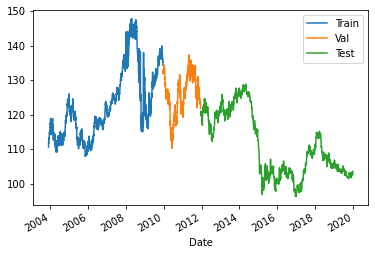

In [60]:
# 学習データのCloseの描画
X_train['Close'].plot(kind='line')
# 検証データのCloseの描画
X_val['Close'].plot(kind='line')
# 評価データのCloseの描画
X_test['Close'].plot(kind='line')
# 折れ線グラフの凡例を表示
plt.legend(['Train', 'Val', 'Test'])
# 描画の実行
plt.show()

## 6日分ごとにデータを抽出する

In [61]:
# # 関数get_tの定義
# def get_t(X, num_date):
#     X_t_list = []
#     for i in range(0, len(X) - num_date, 6): #Index(start,end,step)
#         X_t = X.iloc[i:i+num_date, :]
#         X_t_list.append(X_t)
#     return X_t_list

In [62]:
# # 期間の設定
# num_date = 6
# # 関数get_tの呼び出し
# X_t_list = get_t(X=X_train, num_date=num_date)

### Trainは6日おきにする必要がないと思う(むしろ学習数が減る)ので修正

##　学習用Trainデータ準備

In [85]:
# 関数get_tの定義
def get_t(X, num_date):
    X_t_list = []
    for i in range(0, len(X) - num_date+1): #Index(start,end,step)
        X_t = X.iloc[i:i+num_date, :]
        X_t_list.append(X_t)
    return X_t_list

In [86]:
# 期間の設定
num_date = 6
# 関数get_tの呼び出し
X_t_list = get_t(X=X_train, num_date=num_date)

In [87]:
# 配列抜粋
print(f'X_t_list_配列数 : {len(X_t_list)}\n')
print(f'X_t_list[0]\n{X_t_list[0]}\n')
print(f'X_t_list[1]\n{X_t_list[1]}\n')
print(f'X_t_list[-1]\n{X_t_list[-1]}\n')

X_t_list_配列数 : 1549

X_t_list[0]
                  High         Low        Open       Close       EMA01
Date                                                                  
2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377
2003-12-02  112.008532  110.500532  110.639316  111.823016  111.003988
2003-12-03  112.202814  111.712284  111.832477  112.137524  111.327856
2003-12-04  112.332259  111.406851  112.110343  111.748717  111.448102
2003-12-05  112.766375  111.609834  111.721723  112.729259  111.814147
2003-12-08  113.220483  112.425105  112.553700  113.035088  112.162987

X_t_list[1]
                  High         Low        Open       Close       EMA01
Date                                                                  
2003-12-02  112.008532  110.500532  110.639316  111.823016  111.003988
2003-12-03  112.202814  111.712284  111.832477  112.137524  111.327856
2003-12-04  112.332259  111.406851  112.110343  111.748717  111.448102
2003-12-05  112.766375  111.609

In [88]:
### 答えデータ
# 目的変数の変形
y_train_t = y_train[num_date-1::]
# 目的変数の型の表示
print(f'y_train_t_配列 : {len(y_train_t.shape)}\n')
# 配列の中身
print(f'y_train_t\n{y_train_t}\n')

y_train_t_配列 : 1

y_train_t
Date
2003-12-08    1
2003-12-09    0
2003-12-10    1
2003-12-11    1
2003-12-12    0
             ..
2009-12-10    1
2009-12-11    1
2009-12-14    0
2009-12-15    0
2009-12-16    0
Name: Up, Length: 1549, dtype: int64



## Numpy配列への変換

In [66]:
# # NumPy配列にしてスピードアップ
# # 関数get_tの定義
# def get_t(X, num_date):
#     # 入力データをNumPy配列に変換
#     X = np.array(X)
#     X_t_list = []
#     for i in range(0, len(X) - num_date, 6):
#         X_t = X[i:i+num_date, :]
#         X_t_list.append(X_t)
#     # Numpy配列のreturn
#     return np.array(X_t_list)

# # 期間の設定
# num_date = 6
# # get_tの呼び出し
# X_array_data = get_t(X=X_train, num_date=num_date)
# # 学習データの1件目を表示
# print(X_array_data[0])
# # 学習データの2件目を表示
# print(X_array_data[1])
# # 学習データの最後から2件目を表示
# print(X_array_data[-2])
# # 学習データの最後から1件目を表示
# print(X_array_data[-1])

####　微修正版

In [67]:
# NumPy配列にしてスピードアップ
# 関数get_tの定義
def get_t(X, num_date):
    # 入力データをNumPy配列に変換
    X = np.array(X)
    X_t_list = []
    for i in range(0, len(X) - num_date):
        X_t = X[i:i+num_date, :]
        X_t_list.append(X_t)
    # Numpy配列のreturn
    return np.array(X_t_list)

In [68]:
# 期間の設定
num_date = 6
# get_tの呼び出し
X_array_data = get_t(X=X_train, num_date=num_date)

In [69]:
# 配列抜粋
print(f'X_array_data_配列数 : {len(X_array_data)}\n')
print(f'X_array_data[0]\n{X_array_data[0]}\n')
print(f'X_array_data[1]\n{X_array_data[1]}\n')
print(f'X_array_data[-1]\n{X_array_data[-1]}\n')

X_array_data_配列数 : 1548

X_array_data[0]
[[111.3706392  110.4820618  111.31434709 110.67637712 110.67637712]
 [112.00853199 110.50053179 110.63931584 111.82301611 111.00398826]
 [112.20281422 111.71228439 111.83247715 112.13752419 111.32785567]
 [112.33225852 111.40685141 112.11034298 111.74871713 111.4481018 ]
 [112.76637495 111.60983384 111.72172338 112.72925854 111.81414658]
 [113.22048306 112.42510468 112.55369991 113.03508848 112.16298712]]

X_array_data[1]
[[112.00853199 110.50053179 110.63931584 111.82301611 111.00398826]
 [112.20281422 111.71228439 111.83247715 112.13752419 111.32785567]
 [112.33225852 111.40685141 112.11034298 111.74871713 111.4481018 ]
 [112.76637495 111.60983384 111.72172338 112.72925854 111.81414658]
 [113.22048306 112.42510468 112.55369991 113.03508848 112.16298712]
 [113.56241494 112.83102542 113.04474801 113.31201702 112.49128138]]

X_array_data[-1]
[[137.50965476 135.76586723 137.21388131 135.9474355  137.61423177]
 [136.69680983 135.77185482 135.919482

In [71]:
# X_train

,High,Low,Open,Close,EMA01
Date,,,,,
2003-12-01,111.370639,110.482062,111.314347,110.676377,110.676377
2003-12-02,112.008532,110.500532,110.639316,111.823016,111.003988
2003-12-03,112.202814,111.712284,111.832477,112.137524,111.327856
2003-12-04,112.332259,111.406851,112.110343,111.748717,111.448102
2003-12-05,112.766375,111.609834,111.721723,112.729259,111.814147
...,...,...,...,...,...
2009-12-10,136.529345,135.873556,136.328127,136.247807,136.960945
2009-12-11,136.686720,134.967534,136.251821,135.226003,136.465247
2009-12-14,135.835645,135.150932,135.309091,135.576823,136.211412


## データの標準化

In [93]:
# # データの標準化
# from sklearn.preprocessing import StandardScaler
# # 関数get_standardized_tの定義
# def get_standardized_t(X, num_date):
#     X = np.array(X)
#     X_t_list = []
#     for i in range(0, len(X) - num_date, 6):
#         X_t = X[i:i+num_date]
#         scaler = StandardScaler()
#         X_standardized = scaler.fit_transform(X_t)
#         X_t_list.append(X_standardized)
#     return np.array(X_t_list)

# # 期間の設定
# num_date = 6
# # 関数get_standardized_tの呼び出し
# X_array_data = get_standardized_t(X=X_train, num_date=num_date)
# # 学習データの1件目を表示
# print(X_array_data[0])
# # 学習データの2件目を表示
# print(X_array_data[1])
# # 学習データの最後から2件目を表示
# print(X_array_data[-2])
# # 学習データの最後から1件目を表示
# print(X_array_data[-1])

#### 微修正

In [94]:
# データの標準化
from sklearn.preprocessing import StandardScaler
# 関数get_standardized_tの定義
def get_standardized_t(X, num_date):
    X = np.array(X)
    X_t_list = []
    for i in range(0, len(X) - num_date):
        X_t = X[i:i+num_date]
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X_t)
        X_t_list.append(X_standardized)
    return np.array(X_t_list)

In [95]:
# 期間の設定
num_date = 6
# 関数get_standardized_tの呼び出し
X_array_data = get_standardized_t(X=X_train, num_date=num_date)

In [96]:
# 配列抜粋
print(f'X_array_data_配列数 : {len(X_array_data)}\n')
print(f'X_array_data[0]\n{X_array_data[0]}\n')
print(f'X_array_data[1]\n{X_array_data[1]}\n')
print(f'X_array_data[-1]\n{X_array_data[-1]}\n')

X_array_data_配列数 : 1548

X_array_data[0]
[[-1.62984809 -1.27210819 -0.63075207 -1.77469591 -1.48772019]
 [-0.53107815 -1.24522662 -1.74836406 -0.26579362 -0.81932415]
 [-0.19642712  0.51838102  0.2270873   0.14807855 -0.15856611]
 [ 0.02654061  0.07384809  0.68713442 -0.36356624  0.08676144]
 [ 0.77430589  0.36927255  0.04371838  0.92676245  0.83357025]
 [ 1.55650685  1.55583315  1.42117603  1.32921476  1.54527876]]

X_array_data[1]
[[-1.20412777 -1.67538658 -1.79502953 -1.07255906 -1.38996179]
 [-0.8568361  -0.04745198 -0.20193481 -0.54651412 -0.75059053]
 [-0.6254463  -0.45778732  0.16906832 -1.19683123 -0.5132035 ]
 [ 0.15056402 -0.18508965 -0.34981193  0.44321834  0.20943331]
 [ 0.96231074  0.91018972  0.7610332   0.95474826  0.89810593]
 [ 1.5735354   1.45552581  1.41667474  1.41793781  1.54621657]]

X_array_data[-1]
[[ 1.65276739  0.8052188   1.81890094  0.48881946  1.42613772]
 [ 0.35329982  0.81531397 -0.29202183  1.09038322  0.8494562 ]
 [ 0.08557935  0.98678321  0.3744008   0

In [97]:
# 目的変数の変形
y_train_t = y_train[num_date::]

In [98]:
# 目的変数の型の表示
print(f'y_train_t_配列 : {len(y_train_t.shape)}\n')

# 配列の中身
print(f'y_train_t\n{y_train_t}\n')

y_train_t_配列 : 1

y_train_t
Date
2003-12-09    0
2003-12-10    1
2003-12-11    1
2003-12-12    0
2003-12-15    0
             ..
2009-12-10    1
2009-12-11    1
2009-12-14    0
2009-12-15    0
2009-12-16    0
Name: Up, Length: 1548, dtype: int64



In [99]:
y_train_array_t=np.array(y_train_t)

In [100]:
# 目的変数の型の表示
print(f'y_train_array_t : {len(y_train_array_t)}\n')

# 配列の中身
print(f'y_train_array_t\n{y_train_array_t}\n')

y_train_array_t : 1548

y_train_array_t
[0 1 1 ... 0 0 0]



## testデータも同様に標準化・配列化

In [106]:
# 期間の設定
num_date = 6
# 関数get_standardized_tの呼び出し
test_array_data = get_standardized_t(X=df_test, num_date=num_date)

In [108]:
# 配列抜粋
print(f'test_array_data配列数 : {len(test_array_data)}\n')
print(f'test_array_data[0]\n{test_array_data[0]}\n')
print(f'test_array_data[1]\n{test_array_data[1]}\n')
print(f'test_array_data[-1]\n{test_array_data[-1]}\n')

test_array_data配列数 : 1240

test_array_data[0]
[[-1.03258059 -1.6809803  -1.41569797 -1.41239643 -1.48098472]
 [-0.36554069  0.2809975  -0.03891638 -0.0672961  -0.75934497]
 [-1.18499428 -0.69791866  0.15301636  0.16869925 -0.11727764]
 [ 0.5479873  -0.16368416 -0.75030293 -0.77370295 -0.16425231]
 [ 1.73337915  1.24051497  1.83303397  1.81712314  1.1921599 ]
 [ 0.30174912  1.02107066  0.21886695  0.2675731   1.32969974]]

test_array_data[1]
[[-0.0212557   0.40991603  0.18549107  0.16576657 -1.1343442 ]
 [-0.5680626   0.02283655  0.30717002  0.31622607 -0.34126826]
 [ 0.58832537  0.23408162 -0.26550427 -0.2846051  -0.39929095]
 [ 1.37931639  0.78932495  1.37224515  1.36718333  1.27613755]
 [ 0.42401499  0.70255307  0.3489171   0.37926337  1.44602556]
 [-1.80233846 -2.15871222 -1.94831907 -1.94383423 -0.84725969]]

test_array_data[-1]
[[ 0.30614459  0.3673075   0.22290896  0.21361889 -0.17127527]
 [-0.30032015 -0.25755935  0.70251278  0.69095342  0.99430675]
 [-0.55405029 -0.3049428  -0.

##　モデルの定義

In [101]:
# モデルの定義
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [103]:
# LSTMのモデルを設定
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2]))) #バッチ数、時系列データ数、特徴量数
    model.add(Dropout(dropout)) 
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

## データの学習と予測

In [104]:
np.random.seed(202)
 
# 初期モデルの構築
yen_model = build_model(X_array_data, output_size=1, neurons = 20)

# データを流してフィッティングさせる
yen_history = yen_model.fit(X_array_data, y_train_t, 
                            epochs=25, batch_size=1, verbose=2, shuffle=False)
# 11/5 epochs=50からepochs=10に変更
# 11/5 shuffle=TrueからFalseに変更

Epoch 1/25
1548/1548 - 3s - loss: 0.4772
Epoch 2/25
1548/1548 - 2s - loss: 0.4637
Epoch 3/25
1548/1548 - 2s - loss: 0.4512
Epoch 4/25
1548/1548 - 2s - loss: 0.4493
Epoch 5/25
1548/1548 - 2s - loss: 0.4487
Epoch 6/25
1548/1548 - 2s - loss: 0.4487
Epoch 7/25
1548/1548 - 2s - loss: 0.4477
Epoch 8/25
1548/1548 - 2s - loss: 0.4438
Epoch 9/25
1548/1548 - 2s - loss: 0.4373
Epoch 10/25
1548/1548 - 2s - loss: 0.4397
Epoch 11/25
1548/1548 - 2s - loss: 0.4384
Epoch 12/25
1548/1548 - 2s - loss: 0.4388
Epoch 13/25
1548/1548 - 2s - loss: 0.4345
Epoch 14/25
1548/1548 - 2s - loss: 0.4327
Epoch 15/25
1548/1548 - 2s - loss: 0.4303
Epoch 16/25
1548/1548 - 2s - loss: 0.4298
Epoch 17/25
1548/1548 - 2s - loss: 0.4269
Epoch 18/25
1548/1548 - 2s - loss: 0.4262
Epoch 19/25
1548/1548 - 2s - loss: 0.4236
Epoch 20/25
1548/1548 - 2s - loss: 0.4228
Epoch 21/25
1548/1548 - 2s - loss: 0.4194
Epoch 22/25
1548/1548 - 2s - loss: 0.4186
Epoch 23/25
1548/1548 - 2s - loss: 0.4178
Epoch 24/25
1548/1548 - 2s - loss: 0.4162
E

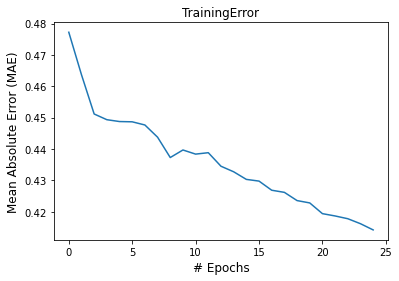

In [105]:
# MAEをプロットしてみよう
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(yen_history.epoch, yen_history.history['loss'])
ax1.set_title('TrainingError')
 
if yen_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [117]:
#作成したモデルを使用し予測。
train_pred = yen_model.predict(test_array_data)

In [118]:
train_pred

array([[0.88986605],
       [0.8664258 ],
       [0.9276768 ],
       ...,
       [0.7651892 ],
       [0.8083412 ],
       [0.96485794]], dtype=float32)

In [120]:
len(train_pred)

1240

In [124]:
train_pred_Interval=train_pred[::6]
len(train_pred_Interval)

207

In [126]:
# 変数名をそのままprint関数内で表示させる関数
def chkprint(*args):
    for obj in args:
        for k, v in globals().items():
            if id(v) == id(obj):
                target = k
                break          
    return target

# データがどのデータ型か、列数、行数を表示する関数
def typeInfo(targetData):
    if (type(targetData) is pd.core.frame.DataFrame):
        print("{} は DataFrame型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is list):
        print("{} は list型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), pd.DataFrame(targetData).shape))    # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is np.ndarray):
        print("{} は ndarray型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is pd.core.series.Series):
        print("{} は Series型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる

In [127]:
typeInfo(train_pred_Interval)

train_pred_Interval は ndarray型
train_pred_Interval の行数, 列数・・・(207, 1)



In [131]:
np.ravel(train_pred_Interval)

array([0.88986605, 1.0682687 , 0.9959466 , 0.42360422, 0.9183289 ,
       0.98906493, 0.9697865 , 0.9864445 , 0.77310914, 0.9558474 ,
       0.96459806, 0.98791194, 0.99469215, 0.96616775, 1.0536473 ,
       0.958344  , 1.0829831 , 0.54461706, 1.0151992 , 0.9766298 ,
       0.8343193 , 0.97152156, 0.8975758 , 0.92950296, 0.968004  ,
       1.032862  , 0.9816171 , 0.8264212 , 0.9753313 , 0.9632203 ,
       0.9437732 , 0.99080276, 0.76241827, 0.9320617 , 0.989346  ,
       0.7734852 , 1.0335047 , 0.97788006, 0.9773199 , 0.8175634 ,
       0.99475837, 0.8018164 , 1.0228187 , 0.9220347 , 1.0127743 ,
       0.9933642 , 0.66381633, 0.7434628 , 0.9730752 , 0.8617861 ,
       0.9745206 , 0.9670731 , 0.9491679 , 0.9623004 , 0.94888043,
       0.9784212 , 0.94098186, 0.9475831 , 0.8152525 , 0.9064636 ,
       0.9936314 , 0.974464  , 0.9944789 , 0.9577399 , 0.97814345,
       1.0005091 , 0.9751849 , 0.92858976, 0.9487065 , 0.7085757 ,
       0.9987904 , 0.90365374, 0.9563212 , 0.95712304, 0.90343

In [129]:
train_pred_Interval_Trans=np.transpose(train_pred_Interval)
typeInfo(train_pred_Interval_Trans)

train_pred_Interval_Trans は ndarray型
train_pred_Interval_Trans の行数, 列数・・・(1, 207)



In [125]:
Df_Array = pd.Series(train_pred_Interval)
Df__Array

ValueError: Data must be 1-dimensional

In [112]:
# 評価データの予測結果を0もしくは1に丸め込み（0.5を境にして、1に近いほど株価が上昇、0に近いほど株価が上昇しない）
predict = np.where(train_pred < 0.5, 0, 1)

# 丸め込んだ予測結果の先頭10件を確認
print('丸め込んだ予測結果の先頭10件')
print(predict[:10])

丸め込んだ予測結果の先頭10件
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [115]:
#ndarray型から行列に変換する。
y_submit = pd.Series(predict)
y_submit

ValueError: Data must be 1-dimensional

In [114]:
#6番目毎のデータ結果のみ取り出す。
y_submit = train_pred[5::6].reset_index(drop=True)
y_submit.shape

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [148]:
# 学習データ、検証データ、評価データの説明変数の変形と変換
# 関数get_standardized_tの定義
def get_standardized_t(X, num_date):
    X = np.array(X)
    X_t_list = []
    for i in range(0, len(X) - num_date + 1, 6):
        X_t = X[i:i+num_date]
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X_t)
        X_t_list.append(X_standardized)
    return np.array(X_t_list)

# 期間の設定
num_date = 6
# 学習用、検証用、評価用データの加工
X_train_t =  get_standardized_t(X=X_train, num_date=num_date)
X_val_t = get_standardized_t(X=X_val, num_date=num_date)
X_test_t = get_standardized_t(X=X_test, num_date=num_date)
# 学習用、検証用、評価用データの形の表示
print(X_train_t.shape)
print(X_val_t.shape)
print(X_test_t.shape)

(259, 6, 5)
(86, 6, 5)
(207, 6, 5)


####　微修正

In [ ]:
# 学習データ、検証データ、評価データの説明変数の変形と変換
# 関数get_standardized_tの定義
def get_standardized_t(X, num_date):
    X = np.array(X)
    X_t_list = []
    for i in range(0, len(X) - num_date + 1, 6):
        X_t = X[i:i+num_date]
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X_t)
        X_t_list.append(X_standardized)
    return np.array(X_t_list)

In [ ]:
# 期間の設定
num_date = 6
# 学習用、検証用、評価用データの加工
X_train_t =  get_standardized_t(X=X_train, num_date=num_date)
X_val_t = get_standardized_t(X=X_val, num_date=num_date)
X_test_t = get_standardized_t(X=X_test, num_date=num_date)

In [149]:
# 学習データ、検証データの目的変数の変形

# 目的変数の変形
y_train_t = y_train[5::6]
y_val_t = y_val[5::6]
# 目的変数の形の表示
print(y_train_t.shape)
print(y_val_t.shape)
# 目的変数の平均値の表示
print(y_train_t.mean())
print(y_val_t.mean())
y_train_t.head()

(259,)
(86,)
0.5366795366795367
0.5581395348837209


Date
2003-12-08    1
2003-12-16    0
2003-12-24    1
2004-01-01    1
2004-01-09    0
Name: Up, dtype: int64

In [ ]:
# 目的変数の型の表示
print(f'y_train_t_配列 : {len(y_train_t.shape)}\n')
print(f'y_val_t_配列 : {len(y_val_t.shape)}\n')

# 配列の中身
print(f'y_train_t\n{y_train_t}\n')
print(f'y_val_t\n{y_val_t}\n')

## モデル作成

In [150]:
# Sequentialのインポート
from keras.models import Sequential
# Dense、LSTMのインポート
from keras.layers import Dense, LSTM

In [151]:
# ネットワークの各層のサイズの定義
num_l1 = 100
num_l2 = 20
num_output = 1

# 以下、ネットワークを構築
model = Sequential()
# 第1層
model.add(LSTM(units=num_l1,
                activation='tanh',
                batch_input_shape=(None, X_train_t.shape[1], X_train_t.shape[2])))
# 第2層
model.add(Dense(num_l2, activation='relu'))
# 出力層
model.add(Dense(num_output, activation='sigmoid'))
# ネットワークのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
# モデルの学習の実行（学習の完了までには数秒から数十秒ほど時間がかかります。）
result = model.fit(x=X_train_t, y=y_train_t, epochs=30, batch_size=24, validation_data=(X_val_t, y_val_t))

Epoch 1/80
11/11 [==============================] - 2s 37ms/step - loss: 0.6909 - accuracy: 0.5367 - val_loss: 0.6799 - val_accuracy: 0.6163
Epoch 2/80
11/11 [==============================] - 0s 5ms/step - loss: 0.6866 - accuracy: 0.5521 - val_loss: 0.6733 - val_accuracy: 0.6395
Epoch 3/80
11/11 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.5753 - val_loss: 0.6711 - val_accuracy: 0.6395
Epoch 4/80
11/11 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.5907 - val_loss: 0.6678 - val_accuracy: 0.6163
Epoch 5/80
11/11 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5907 - val_loss: 0.6589 - val_accuracy: 0.6279
Epoch 6/80
11/11 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.5946 - val_loss: 0.6580 - val_accuracy: 0.6163
Epoch 7/80
11/11 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.6023 - val_loss: 0.6564 - val_accuracy: 0.6163
Epoch 8/80
11/11 [=

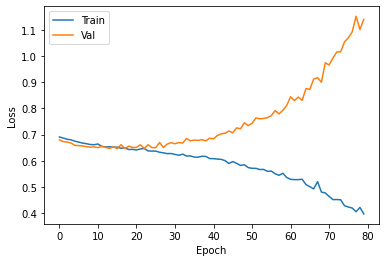

In [153]:
# matplotlibのインポート
from matplotlib import pyplot as plt

# 折れ線グラフによる学習データの損失の描画
plt.plot(result.history['loss'])

# 折れ線グラフによる検証データの損失の描画
plt.plot(result.history['val_loss'])

# 凡例の指定
plt.legend(['Train', 'Val'])

# グラフの軸タイトルの指定
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 描画の実行
plt.show()

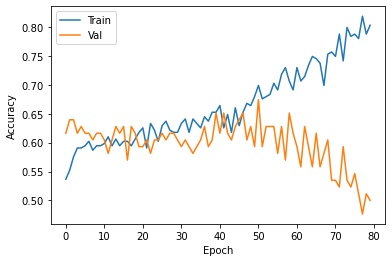

In [154]:
# matplotlibのインポート
from matplotlib import pyplot as plt

# 折れ線グラフによる学習データの正解率の描画
plt.plot(result.history['accuracy'])

# 折れ線グラフによる検証データの正解率の描画
plt.plot(result.history['val_accuracy'])

# 凡例の指定
plt.legend(['Train', 'Val'])

# グラフの軸タイトルの指定
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 描画の実行
plt.show()

## 学習済みモデルを使って、評価（test）データの予測をする！

In [155]:
# 評価データの予測結果の算出
pred_data = model.predict(X_test_t)

# 予測結果の先頭10件を確認
print('予測結果の先頭10件')
print(pred_data[:10])

予測結果の先頭10件
[[0.4750624 ]
 [0.29761112]
 [0.97881424]
 [0.23509273]
 [0.54273427]
 [0.49799502]
 [0.5616262 ]
 [0.506594  ]
 [0.7435405 ]
 [0.4699557 ]]


In [156]:
# 評価データの予測結果を0もしくは1に丸め込み（0.5を境にして、1に近いほど株価が上昇、0に近いほど株価が上昇しない）
predict = np.where(pred_data < 0.5, 0, 1)

# 丸め込んだ予測結果の先頭10件を確認
print('丸め込んだ予測結果の先頭10件')
print(predict[:10])

丸め込んだ予測結果の先頭10件
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]


## 提出用フォーマットのdf_sampleに予測結果を連結する

In [157]:
df_submit

,Date
0,2011-12-22
1,2012-01-05
2,2012-01-19
3,2012-02-02
4,2012-02-16
...,...
202,2019-10-23
203,2019-11-07
204,2019-11-21
205,2019-12-05


In [158]:
# データフレームに変換
predict_df = pd.DataFrame(predict)

In [159]:
# 予測結果とdf_sampleを連結
predict_data = pd.concat([df_submit , predict_df] , axis=1) 

In [160]:
predict_data

,Date,0
0,2011-12-22,0
1,2012-01-05,0
2,2012-01-19,1
3,2012-02-02,0
4,2012-02-16,1
...,...,...
202,2019-10-23,0
203,2019-11-07,0
204,2019-11-21,1
205,2019-12-05,0


In [161]:
# 指定の様式（インデックスはDate、カラム名は「y」のみ）をお守りください。
df_submit = predict_data.set_index("Date") #indexにDateを指定する。


In [162]:
df_submit = predict_data.rename(columns={0: 'y'}) #カラム名「1」を「y」に変更する。
df_submit.to_csv('y_submit.csv') #投稿するファイルを書き出す。
df_submit #投稿する中身を確認する。

,Date,y
0,2011-12-22,0
1,2012-01-05,0
2,2012-01-19,1
3,2012-02-02,0
4,2012-02-16,1
...,...,...
202,2019-10-23,0
203,2019-11-07,0
204,2019-11-21,1
205,2019-12-05,0
